Welcome, here in this Notebook we are going to explore image compression using SVD (single value decomposition )

$ X = U_{r} \sum_{r} V^{T}_{r} $

where,  

X = mstrix is goging to decompose

U = $m x m$ matrix of the orthonormal eigenvectors of $XX^{T}$.
        
$\sum$ = diagonal matrix with r elements equal to the root of the positive eigenvalues of $XX^{T}$ or $X^{T}X$ (both matrics have the same positive eigenvalues anyway).
        
$V^{T}$ = transpose of a nxn matrix containing the orthonormal eigenvectors of $X^{T}X$.
        
r = low rang approximate 

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

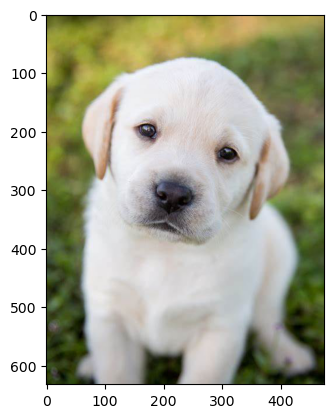

In [2]:
# Original image
image = plt.imread("dog.jpg")
plt.imshow(image, 'gray')

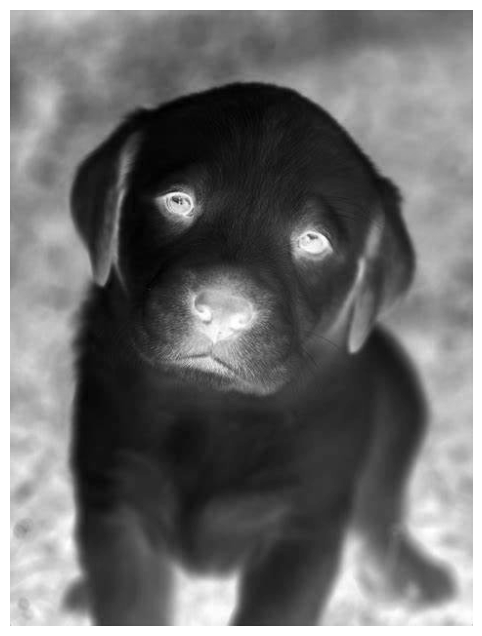

In [3]:
plt.rcParams['figure.figsize']= [16,8]

A = imread("dog.jpg")
x = np.mean(A, -1) #convet RGB to grayscale
img = plt.imshow(256 - x)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [4]:
# image shape
A.shape

(632, 474, 3)

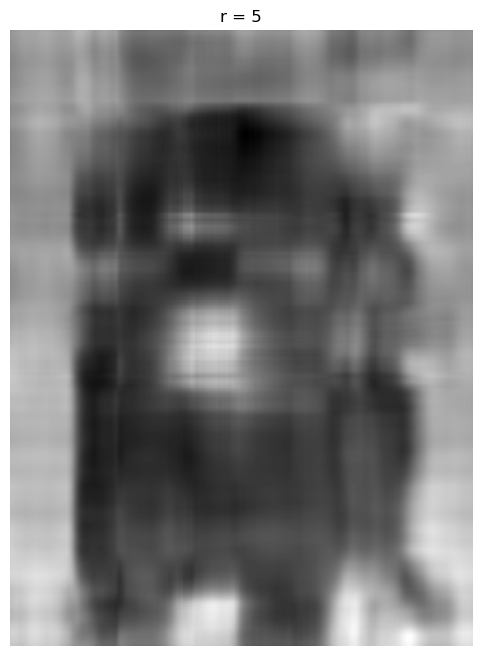

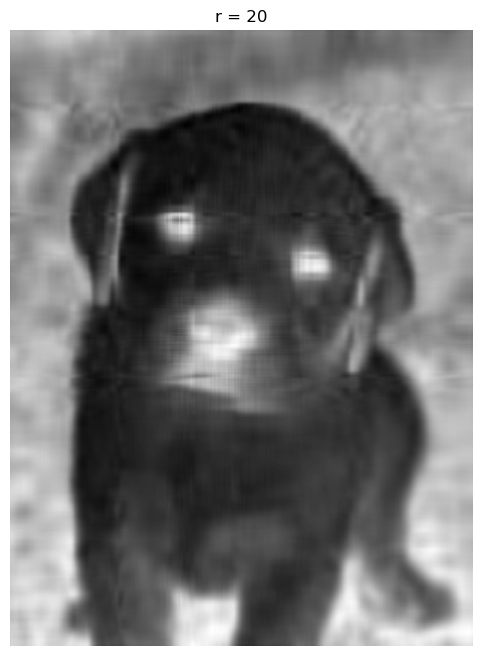

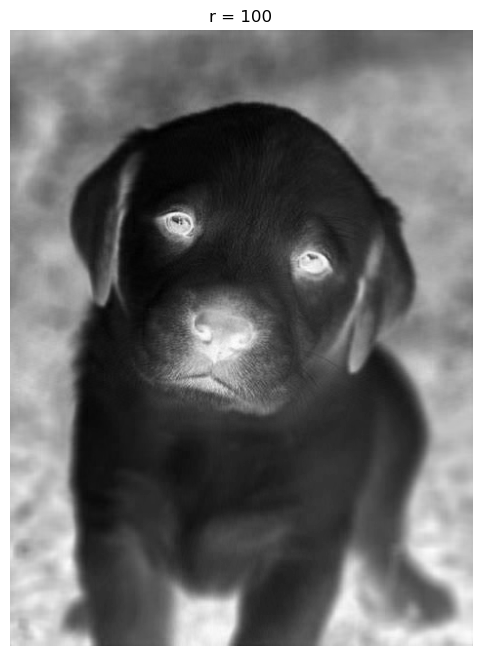

In [5]:
U, S, VT = np.linalg.svd(x, full_matrices=False)
                            # full_matrices=False its meaning is to do economy SVD so insted of
                            # Reruting a U matrix that m*m huge and also V that is n*n this is also huge 
                            # so we are goging to return the first m coloum of U matrix similar to V correspong to its non-zero singuler value
S = np.diag(S)

j=0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(256-Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = '+ str(r))
    plt.show()

### NOTE:
The “@” symbol is used for matrix multiplication in Python.

Here’s what the code does:

U[:,:r] selects all rows and the first r columns of matrix U.

S[0:r,:r] selects the first r rows and columns of matrix S.

VT[:r,:] selects the first r rows and all columns of matrix VT.

The “@” operator then multiplies these three matrices together to produce a new matrix X.

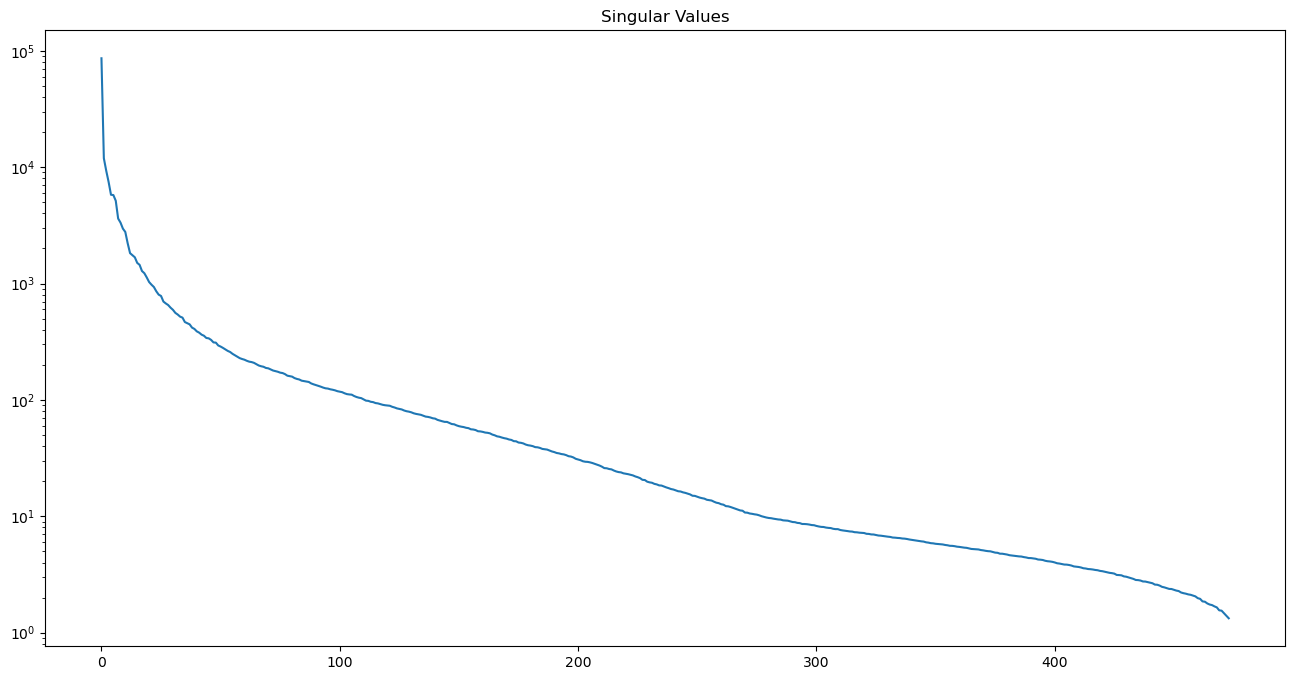

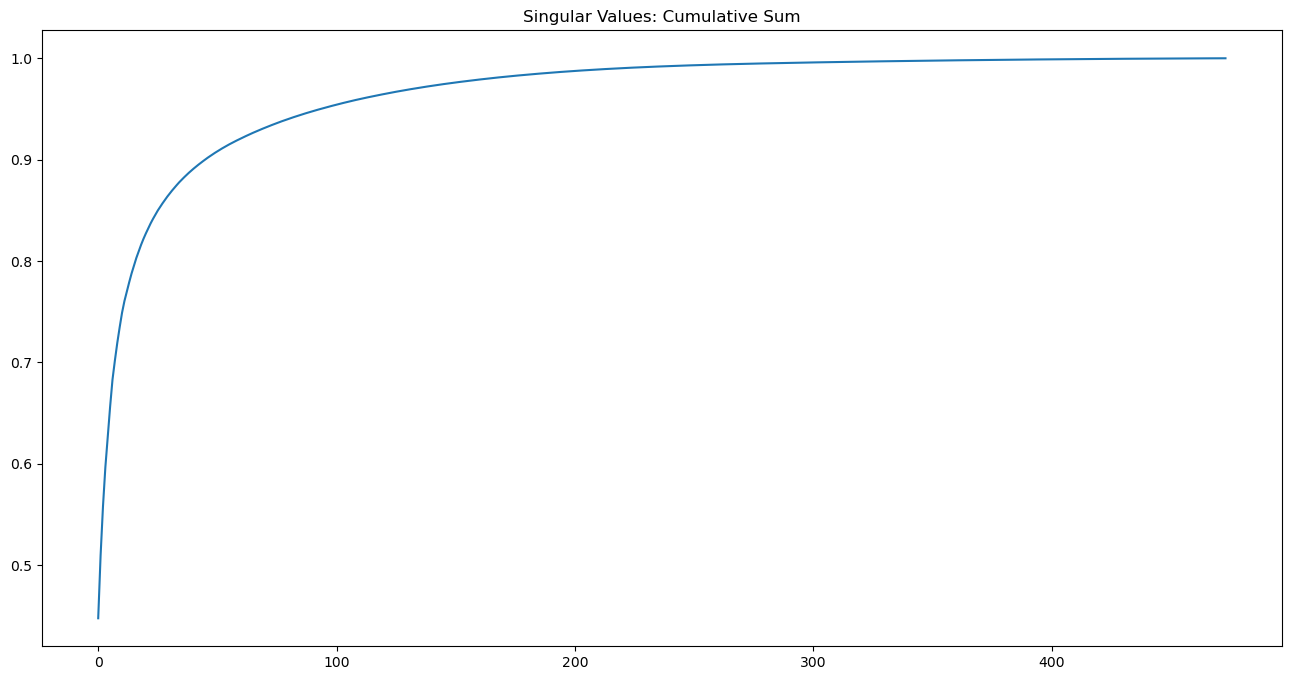

In [6]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/ np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

 From above graph you can see the fraction of energy captured by the first are modes 
 
 it should up to 1 this is kind of 100% of energy or 1
 
 and in rank r this tell you how muchof the matrix is captured by those first hormones.
 
 notice in graph 1, whis is log() scale, there is a lot of energy in very few motes may be 10 or 20 motes and that capturing a largefraction of the energy these SVD are much much larger than towards right side. 
 
 so what that means, I can get away with keeping only these first few left side reading and throwing away a lot of the remaning singular values and truncating and you can also see that in below graph 2 cumulative plot, even just keeping the first singular vector caputure about 30% of the energy and vey rapidly weget up to 70% to 90% just with the first 50 or 100 modes.
 
 So even though it is high resolution image I don't actually need to keep all of that information, I can compress it using the singular value decomposition.
 